# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [44]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

# фильтрую по возрасту на будущее
X_train = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22)]

In [40]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12
5,GP,F,17.0,U,GT3,T,2,3,other,other,...,yes,yes,4,2,1,1,1,3,2,14
6,MS,F,18.0,U,GT3,T,3,3,other,other,...,yes,yes,4,1,3,1,2,1,1,16


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

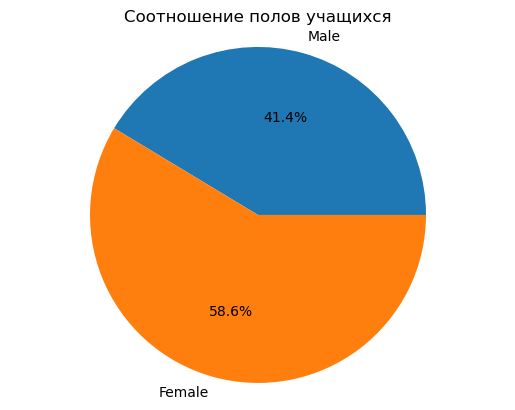

In [79]:
labels = ["Male", "Female"]
male_count = X_train['sex'].value_counts().get('M', 0)
female_count = X_train['sex'].value_counts().get('F', 0)
sizes = [male_count, female_count]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение полов учащихся')
plt.axis('equal')  # Равные оси для круговой диаграммы
plt.show()

## Характеристика: "Age"

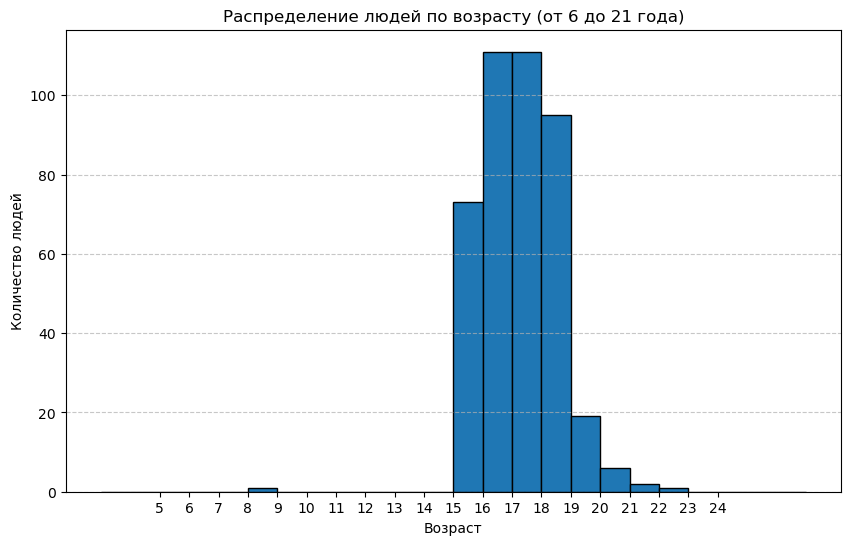

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(X_train['age'], bins=range(3, 28), edgecolor='black')
plt.title('Распределение людей по возрасту (от 6 до 21 года)')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.xticks(range(5, 25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Характеристика: "Weekly study time"

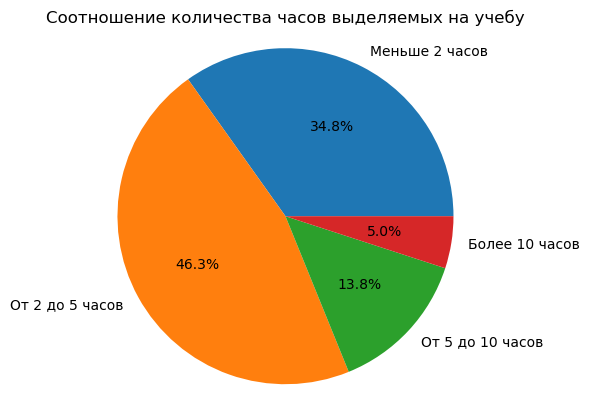

In [81]:
#studytime 1, 2, 3, 4
labels = ["Меньше 2 часов ", "От 2 до 5 часов", "От 5 до 10 часов", "Более 10 часов"]
var_1 = X_train['studytime'].value_counts().get(1, 0)
var_2 = X_train['studytime'].value_counts().get(2, 0)
var_3 = X_train['studytime'].value_counts().get(3, 0)
var_4 = X_train['studytime'].value_counts().get(4, 0)
sizes = [var_1, var_2, var_3, var_4]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение количества часов выделяемых на учебу')
plt.axis('equal')
plt.show()

## Характеристика: "Romantic Relationship"

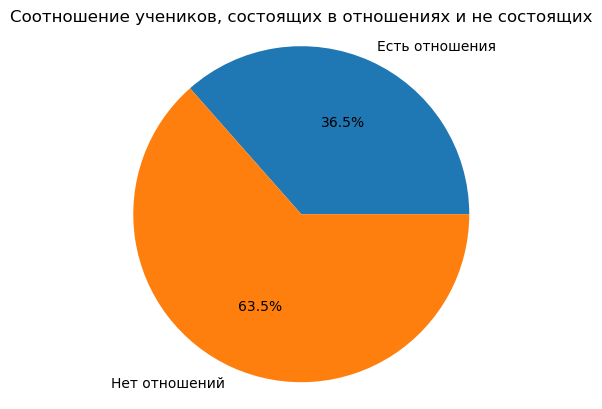

In [82]:
#romantic: yes, no
labels = ["Есть отношения ", "Нет отношений"]
relationship = X_train['romantic'].value_counts().get("yes", 0)
alone = X_train['romantic'].value_counts().get("no", 0)
sizes = [relationship, alone]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение учеников, состоящих в отношениях и не состоящих')
plt.axis('equal')
plt.show()

## Характеристика: "Alcohol Consumption"

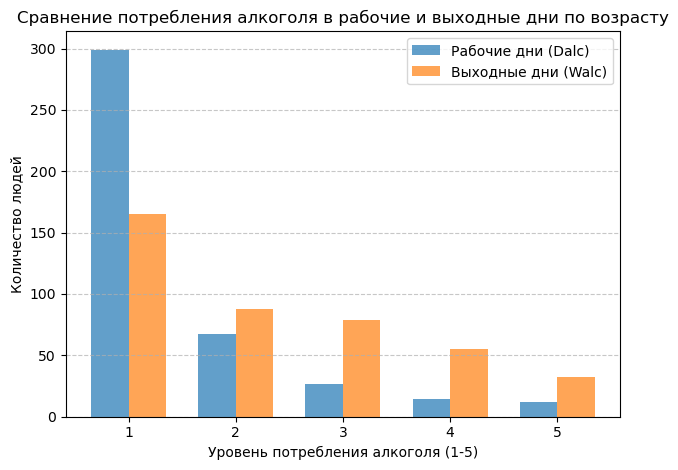

In [83]:
dalc_counts = X_train['Dalc'].value_counts().sort_index()
walc_counts = X_train['Walc'].value_counts().sort_index()

labels = range(1, 6)  
x = range(len(labels)) 
width = 0.35

plt.bar([p - width/2 for p in x], dalc_counts, width=width, label='Рабочие дни (Dalc)', alpha=0.7)
plt.bar([p + width/2 for p in x], walc_counts, width=width, label='Выходные дни (Walc)', alpha=0.7)

plt.title('Сравнение потребления алкоголя в рабочие и выходные дни по возрасту')
plt.xlabel('Уровень потребления алкоголя (1-5)')
plt.ylabel('Количество людей')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Целевая зависимость: "G3" (Final Grade)

C:\Users\A138\AppData\Local\Temp\ipykernel_8104\2325670877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_need['sex'] = df_need['sex'].map({'M': 1, 'F': 0})  # Преобразование пола в числовой формат
C:\Users\A138\AppData\Local\Temp\ipykernel_8104\2325670877.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_need['romantic'] = df_need['romantic'].map({'yes': 1, 'no': 0})


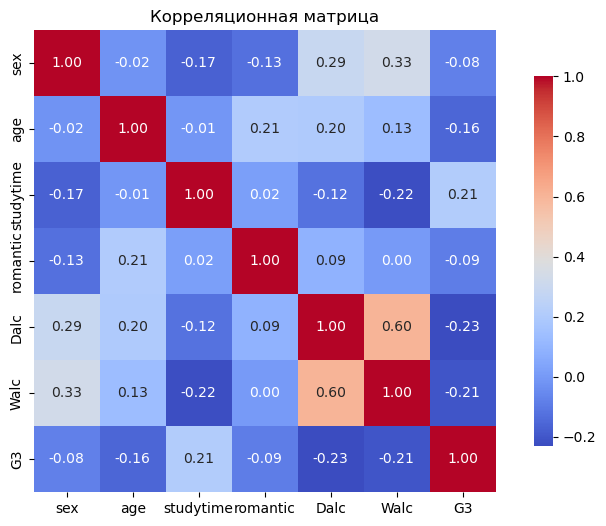

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['sex', 'age', 'studytime', 'romantic', 'Dalc', 'Walc', 'G3']

# Создание нового DataFrame с выбранными столбцами
df_need = X_train[selected_columns]

# Преобразование категориальных переменных в числовые
df_need['sex'] = df_need['sex'].map({'M': 1, 'F': 0})  # Преобразование пола в числовой формат
df_need['romantic'] = df_need['romantic'].map({'yes': 1, 'no': 0})

correlation_matrix = df_need.corr()

# Настройка графика корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()


## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

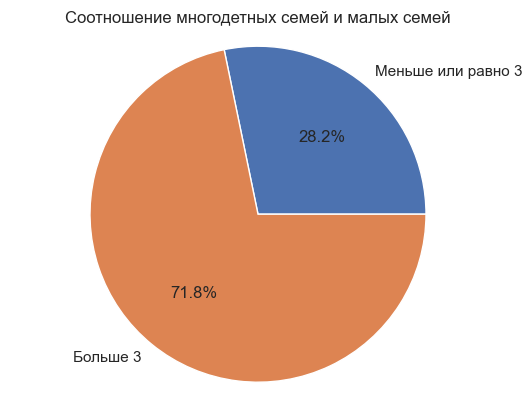

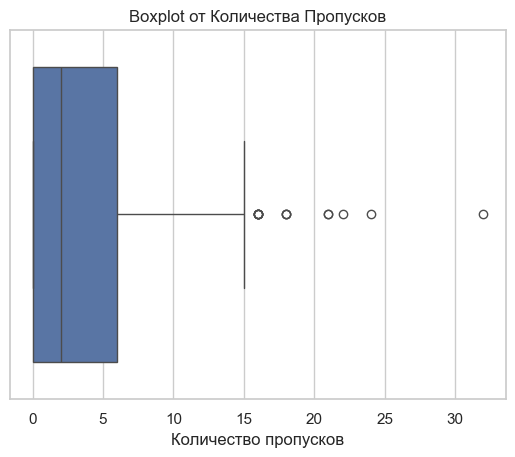

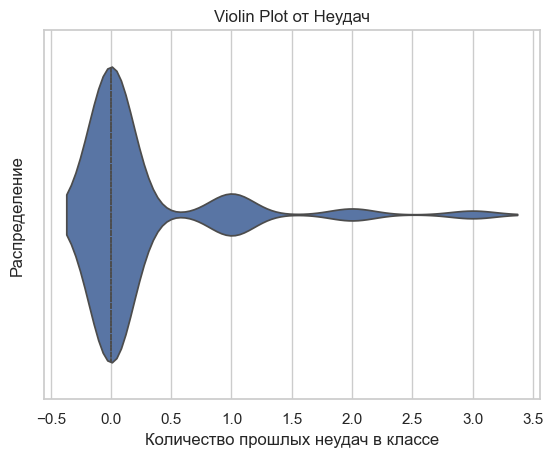

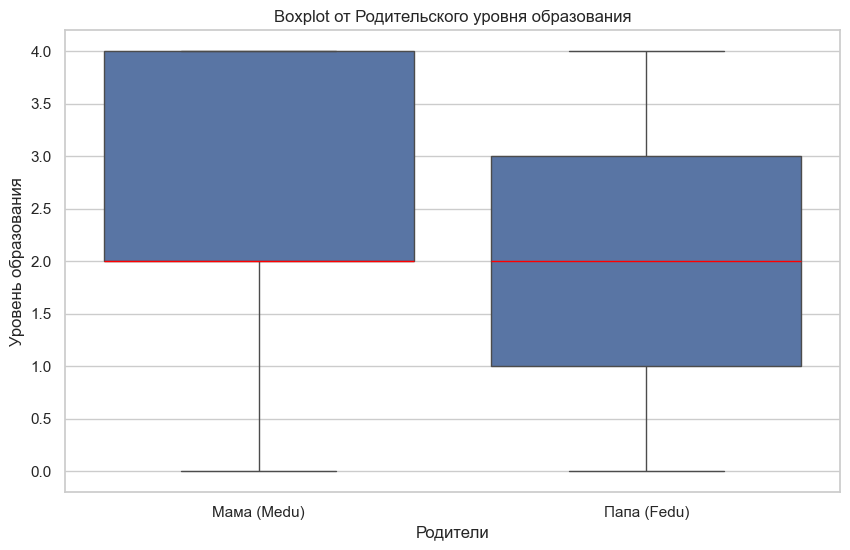

In [29]:
#рассмотрим famsize => pieplot
#traveltime: 1, 2, 3, 4 => boxplot
# => violinplot

labels = ["Меньше или равно 3", "Больше 3"]
nuclear = X_train['famsize'].value_counts().get('LE3', 0)
extended = X_train['famsize'].value_counts().get('GT3', 0)
sizes = [nuclear, extended]
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение многодетных семей и малых семей')
plt.axis('equal') 
plt.show()


sns.set(style="whitegrid")
plt.figure()
sns.boxplot(x=X_train['absences'])
plt.title('Boxplot от Количества Пропусков')
plt.xlabel('Количество пропусков')
plt.show()


sns.set(style="whitegrid")
plt.figure()
sns.violinplot(x='failures', data=X_train, inner="quartile")
plt.title('Violin Plot от Неудач')
plt.xlabel('Количество прошлых неудач в классе')
plt.ylabel('Распределение')


data_long = pd.melt(X_train, value_vars=['Medu', 'Fedu'], var_name='Parent', value_name='Education Level')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parent', y='Education Level', data=data_long, medianprops=dict(color='red'))
#задала красную медиану, так как медиана для образования отца сливалась с границами графика
plt.title('Boxplot от Родительского уровня образования')
plt.xlabel('Родители')
plt.ylabel('Уровень образования')
plt.xticks([0, 1], ['Мама (Medu)', 'Папа (Fedu)']) 
plt.show()




## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

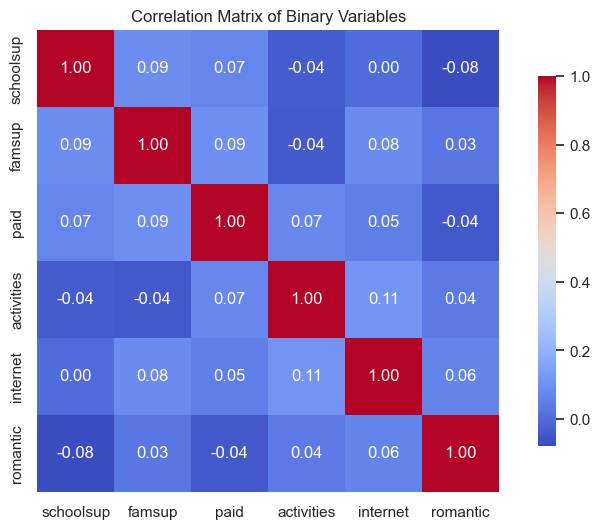

In [36]:
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'internet', 'romantic']
X_train[binary_columns] = X_train[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Вычисляем корреляционную матрицу
correlation_matrix = X_train[binary_columns].corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Binary Variables')
plt.show()

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

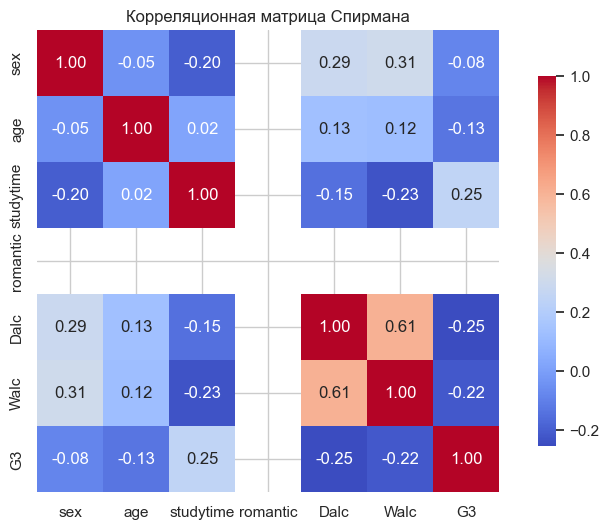

In [ ]:
#для простоты жизни взяла обычную матрицу корреляции из примера выше, для нее уже создано переформатирование бинарных колонок в 1 и 0
correlation_matrix = df_need.corr(method='spearman')

# Настройка графика корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица Спирмана')
plt.show()

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [86]:
unique_counts = X_train.nunique()
unique_counts

school         2
sex            6
age            9
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      22
G3            17
dtype: int64

In [87]:
most_diverse_feature = unique_counts.idxmax()
most_diverse_count = unique_counts.max()
print(f"\nНаиболее разнообразный признак: '{most_diverse_feature}' с {most_diverse_count} уникальными значениями.")


Наиболее разнообразный признак: 'absences' с 22 уникальными значениями.


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

In [88]:
max_grade = X_train['G3'].max()
filtered_data = X_train[(X_train['G3'] == max_grade) & (X_train['traveltime'] > 30)]

if filtered_data.empty:
    print("Нет студентов с максимальными оценками G3 и временем на дорогу больше 30 минут.")
else:
    # Подсчет количества мужчин и женщин
    male_counts = filtered_data['sex'].value_counts().get('M', 0)
    female_counts = filtered_data['sex'].value_counts().get('F', 0)
    gender_counts = [male_counts, female_counts]
    
    # Настройка меток
    labels = ["Ученики", "Ученицы"]
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.title('Соотношение мужского и женского пола для самых высоких оценок (G3) с временем на дорогу > 30 минут')
    plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal') 
    plt.show()


Нет студентов с максимальными оценками G3 и временем на дорогу больше 30 минут.


## Построить boxplot для оценок по возрасту.  

<Figure size 1000x600 with 0 Axes>

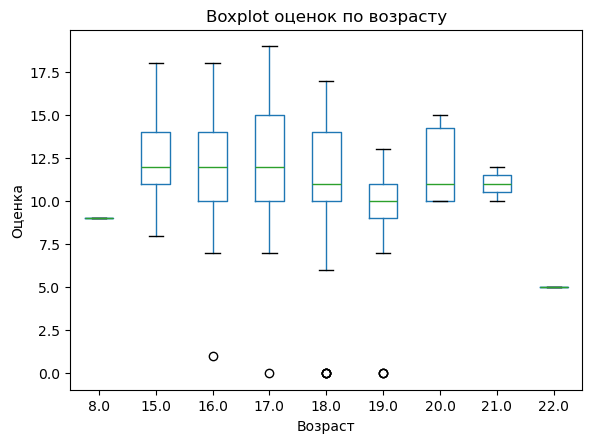

In [89]:
# Построение boxplot
plt.figure(figsize=(10, 6))
X_train.boxplot(column='G3', by='age', grid=False)
plt.title('Boxplot оценок по возрасту')
plt.suptitle('')
plt.xlabel('Возраст')
plt.ylabel('Оценка')
plt.show()


## Найти id топ-5 самых юных отличников.

In [ ]:
honor_students = X_train[X_train['G3'] >= 18]

# Находим топ-5 самых юных отличников
top_5_youngest_honor_students = honor_students.nsmallest(5, 'age')

# Получаем ID
top_5_ids = top_5_youngest_honor_students.index

#ID у нас нигде не указывались, поэтому использую простую нумерацию учеников
print("ID топ-5 самых юных отличников:", top_5_ids.tolist())


ID топ-5 самых юных отличников: [109, 151, 74, 221, 294]


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [91]:
result = X_train.groupby('age')['G3'].agg(['max', 'min']).reset_index()
result

,age,max,min
0,8.0,9,9
1,15.0,18,8
2,16.0,18,1
3,17.0,19,0
4,18.0,17,0
5,19.0,13,0
6,20.0,15,10
7,21.0,12,10
8,22.0,5,5


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

In [6]:
for column in X_train.columns:
    if column == 'age':
        valid_range = X_train[(X_train[column] >= 15) & (X_train[column] <= 22)][column]
    elif column in ['Medu', 'Fedu']:
        valid_range = X_train[(X_train[column] >= 0) & (X_train[column] <= 4)][column]
    elif column in ['traveltime', 'studytime']:
        valid_range = X_train[(X_train[column] >= 1) & (X_train[column] <= 4)][column]
    elif column in ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']:
        valid_range = X_train[(X_train[column] >= 1) & (X_train[column] <= 5)][column]
    elif column == 'absences':
        valid_range = X_train[(X_train[column] >= 0) & (X_train[column] <= 93)][column]
    elif column == 'school':
        valid_range = X_train[(X_train[column] == 'GP') | (X_train[column] == 'MS')][column]
    elif column == 'sex':
        valid_range = X_train[X_train[column].isin(['F', 'M'])][column]
    elif column == 'address':
        valid_range = X_train[X_train[column].isin(['U', 'R'])][column]
    elif column == 'famsize':
        valid_range = X_train[X_train[column].isin(['LE3', 'GT3'])][column]
    elif column == 'Pstatus':
        valid_range = X_train[X_train[column].isin(['T', 'A'])][column]
    elif column in ['Mjob', 'Fjob']:
        valid_range = X_train[X_train[column].isin(['teacher', 'health', 'services', 'at_home', 'other'])][column]
    elif column == 'reason':
        valid_range = X_train[X_train[column].isin(['home', 'reputation', 'course', 'other'])][column]
    elif column == 'guardian':
        valid_range = X_train[X_train[column].isin(['mother', 'father', 'other'])][column]
    elif column in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
        valid_range = X_train[X_train[column].isin(['yes', 'no'])][column]
    else:
        valid_range = X_train[column]
    if column == 'failures':
        X_train[column] = np.where(~X_train[column].isin([1, 2]), 4, X_train[column])
    else:
        mode_value = valid_range.mode()[0]
        X_train[column] = np.where(X_train[column].isin(valid_range), X_train[column], mode_value)

print('все уникальные значения в категориях:')
for column in X_train.columns:
    print(column + ': ' + ', '.join(X_train[column].unique().astype(str)))
#фильтрация по возрасту была произведена еще в начале (на всякий случай)

все уникальные значения в категориях:
school: GP, MS
sex: M, F
age: 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 21.0, 22.0
address: U, R
famsize: GT3, LE3
Pstatus: T, A
Medu: 3, 4, 2, 1, 0
Fedu: 4, 3, 1, 2, 0
Mjob: other, services, health, at_home, teacher
Fjob: other, at_home, services, teacher, health
reason: home, course, reputation, other
guardian: mother, other, father
traveltime: 1, 2, 3, 4
studytime: 2, 1, 3, 4
failures: 4, 1, 2
schoolsup: no, yes
famsup: yes, no
paid: no, yes
activities: yes, no
nursery: yes, no
higher: yes, no
internet: yes, no
romantic: no, yes
famrel: 5, 4, 1, 3, 2
freetime: 5, 2, 1, 3, 4
goout: 1, 5, 3, 2, 4
Dalc: 1, 2, 3, 5, 4
Walc: 1, 3, 2, 5, 4
health: 5, 2, 3, 1, 4
absences: 0, 4, 8, 2, 1, 9, 6, 5, 11, 3, 10, 12, 14, 18, 15, 16, 24, 22, 32, 21, 13, 7
G3: 13, 11, 12, 14, 16, 10, 17, 9, 8, 15, 0, 6, 7, 19, 1, 18, 5


## Удалите скоррелированные данные

In [7]:
print(X_train.dtypes)

X_train_numeric = X_train.select_dtypes(include=[np.number])

corr_matrix = X_train_numeric.corr().abs()

threshold = 0.8

to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:  
            colname = corr_matrix.columns[i]  
            to_drop.add(colname)

df_reduced = X_train_numeric.drop(columns=to_drop)

print("Исходный DataFrame:")
print(X_train.head())
print("\nСкорректированный DataFrame:")
print(df_reduced.head())


school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G3              int64
dtype: object
Исходный DataFrame:
  school sex   age address famsize Pstatus  Medu  Fedu      Mjob   Fjob  ...  \
2     GP   M  15.0       U     GT3       T     3     4     other  other  ...   
3     MS   M  17.0       R     GT3       T     4     3  services  other  ...   
4     GP   F  20.0       R     GT3       T  

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [8]:
# Проверка на наличие пропусков
missing_values = X_train.isnull().sum()
print("Количество пропусков в каждом столбце:")
"print(missing_values)"

#ничего заполнять не нужно, так как пропуски отсутствуют кроме адресса, но есть решение
#можем заполнять данные пропуски самым часто встречающимся значением
most_frequent_value = X_train['address'].mode()[0]
df_filled_mode = X_train.fillna(most_frequent_value)
missing_values = df_filled_mode.isnull().sum()
print(missing_values)

Количество пропусков в каждом столбце:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64


## Закодируйте категориальные признаки

In [9]:
# Задаем категории для кодирования
cols_bin = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
cols_0_to_4 = ['Medu']
cols_1_to_4 = ['traveltime', 'studytime']
cols_1_to_5 = ['famrel', 'freetime', 'goout', 'Dalc', 'health']
cols_interval = [['age', 15, 22], ['absences', 0, 93], ['failures', 1, 2], ['G3', 0, 20]]
cols_or = [['school', 'GP', 'MS'], ['sex', 'F', 'M'], ['address', 'U', 'R'],
            ['famsize', 'LE3', 'GT3'], ['Pstatus', 'T', 'A']]
cols_in = [['Mjob', ['teacher', 'health', 'services', 'at_home', 'other']],
            ['Fjob', ['teacher', 'health', 'services', 'at_home', 'other']],
            ['reason', ['home', 'reputation', 'course', 'other']],
            ['guardian', ['mother', 'father', 'other']]]

# Создаем список колонок для кодирования
encode_cols = cols_bin + [col[0] for col in cols_or] + [col[0] for col in cols_in]

# Инициализируем словарь для хранения LabelEncoder для каждой колонки
label_encoders = {}

# Кодируем каждую категорию в DataFrame
for col in encode_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

# Теперь X_train содержит закодированные категориальные признаки


## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [10]:
"""
Исходя из наших примеров, мы можем сопоставить сложный признак: 
Этот признак показывает эффективность учебного времени, учитывая, что время, проведенное на учебу, может быть менее продуктивным при высоком потреблении алкоголя (Dalc).  
Это позволяет создать нелинейную связь между временем учебы и потреблением алкоголя, что может помочь в оценке успеваемости
"""
X_train['study_efficiency'] = X_train['studytime']/X_train['Dalc']

In [12]:
"""
Также можем отметить еще один признак:
Этот признак может быть использован для анализа влияния образовательной поддержки и здоровья на успеваемость студентов или другие аспекты их жизни.
"""
binary_columns = ['schoolsup', 'famsup', 'internet']
X_train[binary_columns] = X_train[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
X_train['possibility_index'] = (X_train['schoolsup'] * 2 +  X_train['famsup'] * 2 +  X_train['higher'] + X_train['internet'] +  X_train['health']) / 10

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [ ]:
# Ваш код
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import warnings

## Разделите данные и объясните выбор стратегии

In [45]:
# Ваш код
copy = X_train.copy()
X = copy.drop(columns=['G3'])  # Удаляем столбец 'G3' из признаков
y = copy['G3']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train_split, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверяем размеры выборок
print(f'Размер обучающей выборки: {X_train_split.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')


Размер обучающей выборки: 334
Размер тестовой выборки: 84


__Ваш ответ:__ Выбрала sklearn из-за простоты работы с ним

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [46]:
# Ваш код
#используя данные из источника, наши данные в файле должны иметь такие значения:
valid_values = {
    'school': ['GP', 'MS'],
    'sex': ['F', 'M'],
    'age': range(15, 23), 
    'address': ['U', 'R'],
    'famsize': ['LE3', 'GT3'],
    'Pstatus': ['T', 'A'],
    'Medu': range(0, 5),  
    'Fedu': range(0, 5),  
    'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'Fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'reason': ['close to home', 'school reputation', 'course preference', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'traveltime': [1, 2, 3, 4],
    'studytime': [1, 2, 3, 4],
    'failures': [0, 1, 2, 4],  
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no'],
    'romantic': ['yes', 'no'],
    'famrel': range(1, 6),  
    'freetime': range(1, 6),  
    'goout': range(1, 6), 
    'Dalc': range(1, 6),  
    'Walc': range(1, 6),  
    'health': range(1, 6),
    'absences': range(0, 94)
    }

def filter_data(df, valid_values):
    for column, valid in valid_values.items():
        if isinstance(valid, range):
            df[column] = df[column].apply(lambda x: x if x in valid else np.nan)
        else:
            df[column] = df[column].apply(lambda x: x if x in valid else np.nan)

filter_data(copy, valid_values)

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [ ]:
# Ваш код
warnings.simplefilter('ignore')

encode_col = cols_bin + [i[0] for i in cols_or] + [i[0] for i in cols_in]

encodeLabel = {}
for column in encode_col:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].values)
    encodeLabel[column] = le

X = X.replace('unfind', np.nan)

k = 15
imputer = KNNImputer(n_neighbors=k)

X_new = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

## KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

neigh = KNeighborsClassifier(n_neighbors=5)
regr = KNeighborsRegressor(n_neighbors=5)

kf = KFold(n_splits=4, shuffle=True, random_state=1)
mse_scores_classifier = []
mse_scores_regressor = []

for train_index, test_index in kf.split(X):
    # Индексирование с использованием .iloc
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    neigh.fit(X_train, y_train)
    regr.fit(X_train, y_train)
    y_pred_classifier = neigh.predict(X_test)
    y_pred_regressor = regr.predict(X_test)
    mse_classifier = mean_squared_error(y_test, y_pred_classifier)
    mse_scores_classifier.append(mse_classifier)
    mse_regressor = mean_squared_error(y_test, y_pred_regressor)
    mse_scores_regressor.append(mse_regressor)

print("MSE для классификатора:", mse_scores_classifier)
print("MSE для регрессора:", mse_scores_regressor)


MSE для классификатора: [17.238095238095237, 18.19047619047619, 15.413461538461538, 15.778846153846153]
MSE для регрессора: [8.24495238095238, 9.262095238095238, 8.21923076923077, 13.327692307692306]


## Bayes

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=4, shuffle=True, random_state=1)
mse_scores_classifier = []
mse_scores_regressor = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Инициализация модели
    nb_model = GaussianNB()
    
    # Обучение модели
    nb_model.fit(X_train, y_train)
    
    # Предсказания
    y_pred = nb_model.predict(X_test)

    # Вычисление метрик
    mse_scores_classifier.append(mean_squared_error(y_test, y_pred))
    mse_scores_regressor.append(mean_absolute_error(y_test, y_pred))

# Вывод средних значений метрик
print("Средняя квадратичная ошибка (MSE):", np.mean(mse_scores_classifier))
print("Средняя абсолютная ошибка (MAE):", np.mean(mse_scores_regressor))


Средняя квадратичная ошибка (MSE): 24.72385531135531
Средняя абсолютная ошибка (MAE): 4.045695970695971


## Регрессия

In [58]:
from sklearn.linear_model import Ridge

# Параметры альфа
alpha_values = [0, 0.05, 0.5, 5, 10, 20, 50, 100]
mse_scores = []
mae_scores = []

# Настройка KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Обучение и оценка модели Ridge для различных значений alpha
for alpha in alpha_values:
    mse_fold_scores = []
    mae_fold_scores = []

    for train_idx, test_idx in kf.split(X):
        # Индексирование с использованием .iloc
        x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Инициализация и обучение модели
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_train, y_train)
        
        # Предсказания
        y_pred = ridge_model.predict(x_test)

        # Вычисление метрик
        mse_fold_scores.append(mean_squared_error(y_test, y_pred))
        mae_fold_scores.append(mean_absolute_error(y_test, y_pred))

    # Сохранение средних значений метрик для текущего alpha
    mse_scores.append(np.mean(mse_fold_scores))
    mae_scores.append(np.mean(mae_fold_scores))

# Нахождение оптимального значения alpha
optimal_alpha_idx = np.argmin(mse_scores)
print('Оптимальное значение alpha =', alpha_values[optimal_alpha_idx])
print('MSE =', mse_scores[optimal_alpha_idx])
print('MAE =', mae_scores[optimal_alpha_idx])


Оптимальное значение alpha = 10
MSE = 7.469324078477851
MAE = 1.9835759714625614


## SVM

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR

# Инициализация моделей с уже оптимальными параметрами
knn_model = KNeighborsRegressor(n_neighbors=5)
ridge_model = Ridge(alpha=alpha_values[optimal_alpha_idx])
multinomial_nb = MultinomialNB()
svr_model = SVR()

# Словарь для хранения предсказаний
predictions = {'KNN': [], 'MultinomialNB': [], 'Ridge': [], 'SVR': []}
true_values = []

# Настройка KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Обучение моделей и сбор предсказаний
for train_idx, test_idx in kf.split(X):
    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Обучение моделей
    knn_model.fit(x_train, y_train)
    multinomial_nb.fit(x_train, y_train)
    ridge_model.fit(x_train, y_train)
    svr_model.fit(x_train, y_train)

    # Сбор предсказаний
    predictions['KNN'].extend(knn_model.predict(x_test))
    predictions['MultinomialNB'].extend(multinomial_nb.predict(x_test))
    predictions['Ridge'].extend(ridge_model.predict(x_test))
    predictions['SVR'].extend(svr_model.predict(x_test))
    true_values.extend(y_test)

# Создание DataFrame для предсказаний
pred_df = pd.DataFrame(predictions)

# Вычисление корреляционной матрицы
corr_matrix = pred_df.corr()
print("Correlation Matrix:\n", corr_matrix)

# Вычисление весов на основе корреляции
corr_weights = 1 / corr_matrix.sum()
corr_weights /= corr_weights.sum()
print('Calculated Weights for Predictions:\n', corr_weights)

# Применение весов для вычисления взвешенных предсказаний
weighted_predictions = sum(pred_df[column] * weight for column, weight in corr_weights.items())

# Вычисление метрик оценки
mse_value = mean_squared_error(true_values, weighted_predictions)
mae_value = mean_absolute_error(true_values, weighted_predictions)
print("Evaluation Metrics:")
print("Mean Squared Error (MSE): {:.4f}".format(mse_value))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_value))


Correlation Matrix:
                     KNN  MultinomialNB     Ridge       SVR
KNN            1.000000       0.456379  0.634824  0.690527
MultinomialNB  0.456379       1.000000  0.542828  0.517725
Ridge          0.634824       0.542828  1.000000  0.784677
SVR            0.690527       0.517725  0.784677  1.000000
Calculated Weights for Predictions:
 KNN              0.251656
MultinomialNB    0.278132
Ridge            0.236314
SVR              0.233898
dtype: float64
Evaluation Metrics:
Mean Squared Error (MSE): 8.1456
Mean Absolute Error (MAE): 2.1040


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Инициализация классификаторов
DTc = DecisionTreeClassifier(criterion='entropy')
Kc = KNeighborsClassifier(n_neighbors=25)  # Можно попробовать и другие значения n_neighbors
SVCc = SVC(C=1, probability=True)

# Определение параметров для настройки
params = {
    'DTc__max_depth': [2, 3, 4, 8],
    'Kc__n_neighbors': [10, 25, 30],
    'svc__C': [1, 4, 10],  # Можно использовать логарифмическое пространство
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']  # Разнообразие ядер
}

# Создание голосующего классификатора с мягким голосованием
Vc = VotingClassifier(estimators=[('DTc', DTc), ('Kc', Kc), ('svc', SVCc)], voting='soft')

grid = GridSearchCV(estimator=Vc, param_grid=params, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

test_score = grid.score(X_test, y_test)
print("Test score:", test_score)



Best parameters: {'DTc__max_depth': 2, 'Kc__n_neighbors': 30, 'svc__C': 10, 'svc__kernel': 'rbf'}
Best score: 0.22139303482587064
Test score: 0.2619047619047619


Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

Correlation matrix of predictions:
               Decision_Tree       KNN       SVC
Decision_Tree       1.000000  0.155998  0.118759
KNN                 0.155998  1.000000  0.324069
SVC                 0.118759  0.324069  1.000000


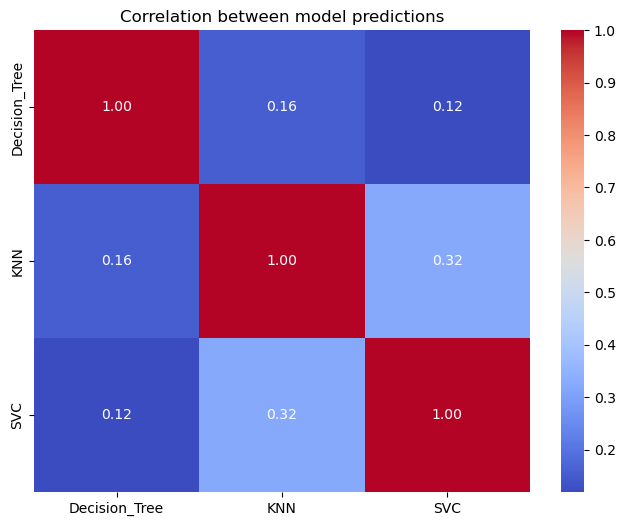

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Инициализация классификаторов
DTc = DecisionTreeClassifier(criterion='entropy')
Kc = KNeighborsClassifier(n_neighbors=25)
SVCc = SVC(C=1, probability=True)

# Обучение моделей
DTc.fit(X_train, y_train)
Kc.fit(X_train, y_train)
SVCc.fit(X_train, y_train)

# Получение предсказаний
predictions_DT = DTc.predict(X_test)
predictions_KNN = Kc.predict(X_test)
predictions_SVC = SVCc.predict(X_test)

# Создание DataFrame для предсказаний
predictions_df = pd.DataFrame({
    'Decision_Tree': predictions_DT,
    'KNN': predictions_KNN,
    'SVC': predictions_SVC
})

# Оценка корреляции между предсказаниями
correlation_matrix = predictions_df.corr()

# Вывод корреляционной матрицы
print("Correlation matrix of predictions:")
print(correlation_matrix)

# Дополнительно, можно визуализировать корреляцию
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between model predictions')
plt.show()


## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
X_test = pd.read_csv("X_test.csv").copy()
X_test = X_test.drop(['Fedu', 'Walc'], axis=1)

# Обработка данных
for column in X_test.columns:
    if column == 'age':
        valid_range = X_test[(X_test[column] >= 15) & (X_test[column] <= 22)][column]
    elif column in ['Medu', 'Fedu']:
        valid_range = X_test[(X_test[column] >= 0) & (X_test[column] <= 4)][column]
    elif column in ['traveltime', 'studytime']:
        valid_range = X_test[(X_test[column] >= 1) & (X_test[column] <= 4)][column]
    elif column in ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']:
        valid_range = X_test[(X_test[column] >= 1) & (X_test[column] <= 5)][column]
    elif column == 'absences':
        valid_range = X_test[(X_test[column] >= 0) & (X_test[column] <= 93)][column]
    elif column == 'school':
        valid_range = X_test[(X_test[column] == 'GP') | (X_test[column] == 'MS')][column]
    elif column == 'sex':
        valid_range = X_test[X_test[column].isin(['F', 'M'])][column]
    elif column == 'address':
        valid_range = X_test[X_test[column].isin(['U', 'R'])][column]
    elif column == 'famsize':
        valid_range = X_test[X_test[column].isin(['LE3', 'GT3'])][column]
    elif column == 'Pstatus':
        valid_range = X_test[X_test[column].isin(['T', 'A'])][column]
    elif column in ['Mjob', 'Fjob']:
        valid_range = X_test[X_test[column].isin(['teacher', 'health', 'services', 'at_home', 'other'])][column]
    elif column == 'reason':
        valid_range = X_test[X_test[column].isin(['home', 'reputation', 'course', 'other'])][column]
    elif column == 'guardian':
        valid_range = X_test[X_test[column].isin(['mother', 'father', 'other'])][column]
    elif column in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
        valid_range = X_test[X_test[column].isin(['yes', 'no'])][column]
    else:
        valid_range = X_test[column]

    if column == 'failures':
        X_test[column] = np.where(~X_test[column].isin([1, 2]), 4, X_test[column])
    else:
        mode_value = valid_range.mode()[0] if not valid_range.empty else np.nan
        X_test[column] = np.where(X_test[column].isin(valid_range), X_test[column], mode_value)

print('все уникальные значения в категориях:')
for column in X_test.columns:
    print(column + ': ' + ', '.join(X_test[column].unique().astype(str)))

missing_values = X_test.isnull().sum()
print("Количество пропусков в каждом столбце:")
print(missing_values)

# Удаление коррелирующих признаков
X_test_numeric = X_test.select_dtypes(include=[np.number])
corr_matrix = X_test_numeric.corr().abs()

threshold = 0.8
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:  
            colname = corr_matrix.columns[i]  
            to_drop.add(colname)

df_reduced = X_test_numeric.drop(columns=to_drop)

print("Исходный DataFrame:")
print(X_test.head())
print("\nСкорректированный DataFrame:")
print(df_reduced.head())

# Кодирование категориальных переменных
cols_bin = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
cols_or = [['school', 'GP', 'MS'], ['sex', 'F', 'M'], ['address', 'U', 'R'],
            ['famsize', 'LE3', 'GT3'], ['Pstatus', 'T', 'A']]
cols_in = [['Mjob', ['teacher', 'health', 'services', 'at_home', 'other']],
            ['Fjob', ['teacher', 'health', 'services', 'at_home', 'other']],
            ['reason', ['home', 'reputation', 'course', 'other']],
            ['guardian', ['mother', 'father', 'other']]]

# Создаем список колонок для кодирования
encode_cols = cols_bin + [col[0] for col in cols_or] + [col[0] for col in cols_in]

# Инициализируем словарь для хранения LabelEncoder для каждой колонки
label_encoders = {}

# Кодируем каждую категорию в DataFrame
for col in encode_cols:
    le = LabelEncoder()
    # Используем X_test[col] для кодирования, чтобы избежать ValueError
    X_test[col] = le.fit_transform(X_test[col])
    label_encoders[col] = le

# Вывод финального DataFrame
print(X_test)



все уникальные значения в категориях:
school: MS, GP
sex: M, F
age: 18, 16, 15, 17, 19
address: U, R
famsize: GT3, LE3
Pstatus: T, A
Medu: 4, 3, 1, 2, 0
Mjob: teacher, services, at_home, other, health
Fjob: teacher, other, services, health, at_home
reason: home, course, reputation, other
guardian: father, mother, other
traveltime: 1, 2, 3, 4
studytime: 2, 3, 4, 1
failures: 4, 1, 2
schoolsup: no, yes
famsup: no, yes
paid: no, yes
activities: yes, no
nursery: no, yes
higher: yes, no
internet: yes, no
romantic: no, yes
famrel: 3, 2, 4, 5, 1
freetime: 2, 3, 4, 1, 5
goout: 4, 3, 5, 2, 1
Dalc: 1, 2, 3, 4, 5
health: 2, 4, 1, 5, 3
absences: 4, 2, 0, 5, 6, 10, 8, 9, 14, 16, 15, 1, 11, 30, 12, 3, 7, 22, 26
Количество пропусков в каждом столбце:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0

In [82]:
# Составляем список колонок для кодирования
encode_col = cols_bin + [i[0] for i in cols_or] + [i[0] for i in cols_in]

# Инициализируем словарь для хранения LabelEncoder для каждой колонки
encodeLabel = {}

# Кодируем каждую категорию в DataFrame
for column in encode_col:
    le = LabelEncoder()
    # Используем X_test[column] для кодирования
    X_test[column] = le.fit_transform(X_test[column].values)
    encodeLabel[column] = le

# Обработка значений 'unfind' (если такие есть)
# Замените 'unfind' на np.nan
X_test.replace('unfind', np.nan, inplace=True)

# Импутация пропусков с использованием KNN
k = 15
imputer = KNNImputer(n_neighbors=k)

# Применяем KNNImputer к X_test
X_new = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

# Выводим финальный DataFrame
print(X_new)


     school  sex   age  address  famsize  Pstatus  Medu  Mjob  Fjob  reason  \
0       1.0  1.0  18.0      1.0      0.0      1.0   4.0   4.0   4.0     1.0   
1       0.0  0.0  16.0      1.0      0.0      0.0   3.0   3.0   2.0     0.0   
2       1.0  0.0  18.0      1.0      0.0      1.0   4.0   4.0   4.0     3.0   
3       1.0  1.0  16.0      0.0      1.0      0.0   4.0   0.0   2.0     1.0   
4       0.0  0.0  15.0      0.0      0.0      1.0   1.0   2.0   2.0     3.0   
..      ...  ...   ...      ...      ...      ...   ...   ...   ...     ...   
190     0.0  0.0  18.0      0.0      0.0      1.0   2.0   2.0   2.0     3.0   
191     0.0  1.0  18.0      1.0      0.0      1.0   2.0   2.0   0.0     0.0   
192     0.0  0.0  16.0      1.0      0.0      0.0   2.0   2.0   2.0     1.0   
193     0.0  0.0  17.0      1.0      0.0      1.0   1.0   0.0   2.0     0.0   
194     0.0  0.0  17.0      1.0      0.0      1.0   1.0   0.0   2.0     3.0   

     ...  nursery  higher  internet  romantic  famr

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.

In [83]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Параметры
n = 100  # Количество примеров для тестового набора
N = 5    # Количество фолдов для кросс-валидации

# Загрузка данных
train_data = pd.read_csv('train_features_with_answers.csv').copy()
test_data = pd.read_csv('X_test.csv').copy()

# Добавление метки для различия между обучающим и тестовым наборами
train_data['is_test'] = 0
test_data['is_test'] = 1

# Объединение данных и перемешивание
combined_data = pd.concat([train_data, test_data], axis=0).sample(frac=1).reset_index(drop=True)

# Кодирование категориальных переменных
encode_lab = {}
for column in combined_data.columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column].values)
    encode_lab[column] = le

# Разделение на признаки и целевую переменную
X = combined_data.drop(['is_test'], axis=1)
y = combined_data['is_test']

# Обучение модели KNN
k_values = [3, 5, 7, 9]  # Пример значений k для KNN
best_k_idx = 1  # Индекс лучшего значения k, который вы можете определить с помощью валидации
knn_model = KNeighborsClassifier(n_neighbors=k_values[best_k_idx])

# Получение предсказаний с использованием кросс-валидации
predictions = cross_val_predict(knn_model, X, y, cv=N, method='predict_proba')

# Создание DataFrame для предсказаний
df_predictions = pd.DataFrame(predictions, columns=['train_proba', 'test_proba'])
combined_data_with_predictions = pd.concat([combined_data.reset_index(drop=True), df_predictions], axis=1)

# Сортировка данных по вероятности тестового набора
sorted_data = combined_data_with_predictions.sort_values(by='test_proba', ascending=False)

# Разделение на обучающий и тестовый наборы
train_set = sorted_data.iloc[:-n]
test_set = sorted_data.iloc[-n:]

_X_train = train_set.drop(['is_test', 'test_proba', 'train_proba'], axis=1)
_X_val = test_set.drop(['is_test', 'test_proba', 'train_proba'], axis=1)
_y_train = train_set['is_test'].values
_y_val = test_set['is_test'].values

# Обучение модели на обучающем наборе и оценка на валидационном наборе
knn_model.fit(_X_train, _y_train)
val_predictions = knn_model.predict(_X_val)
accuracy = accuracy_score(_y_val, val_predictions)

print(f'Accuracy on validation set: {accuracy:.2f}')


Accuracy on validation set: 1.00
